In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from aggregation import Aggregator
from astropy.io import ascii

Broken libmagic installation detected. The python-magic module is installed but can't be imported. Please check that both python-magic and the libmagic shared library are installed correctly. Uploading media other than images may not work.


In [2]:
aggregator        = Aggregator('reductions/point_reducer_hdbscan_box_the_jets.csv', 
                               'reductions/shape_reducer_hdbscan_box_the_jets.csv')
aggregator_merged = Aggregator('reductions/point_reducer_hdbscan_box_the_jets_merged.csv', 
                               'reductions/shape_reducer_hdbscan_box_the_jets_merged.csv')

In [3]:
multijet_subjects = ascii.read('multiplejets_20220209.txt', format='fast_no_header')

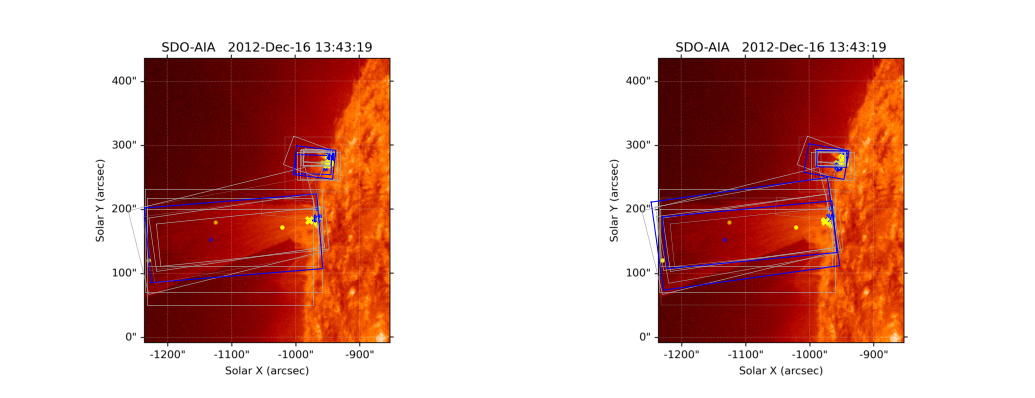

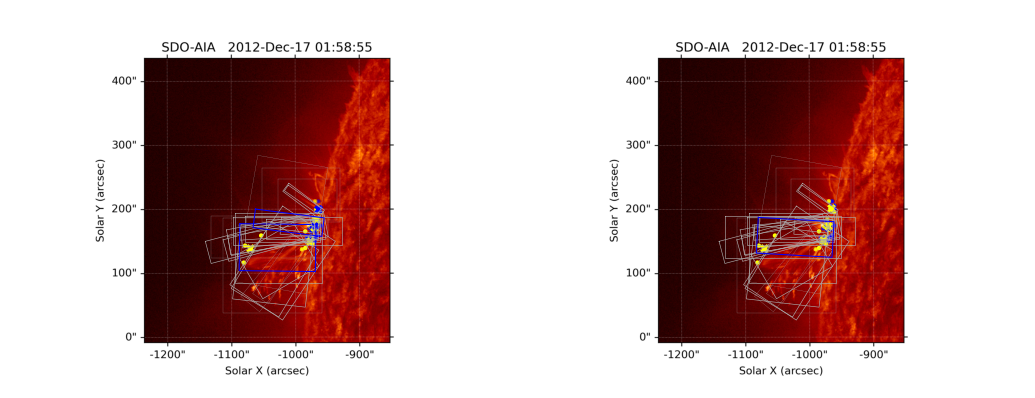

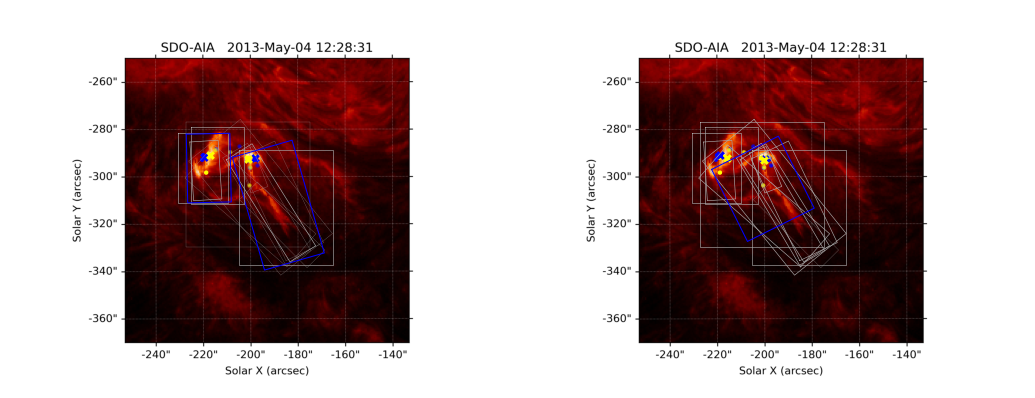

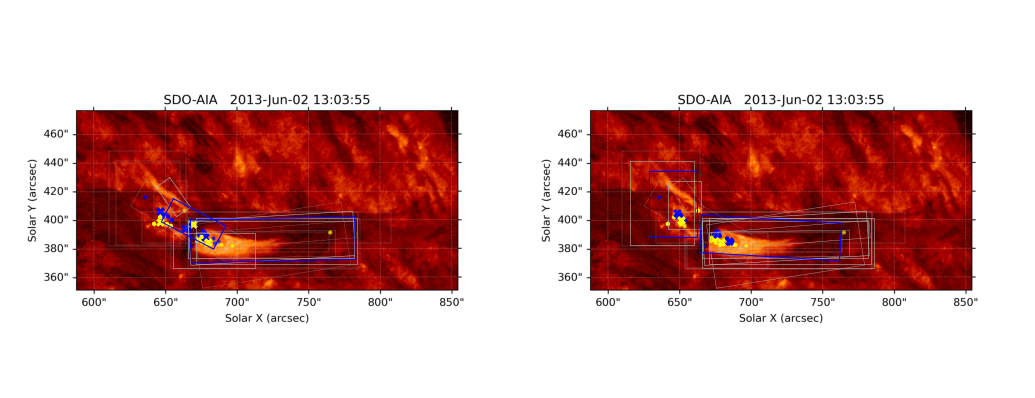

62832745 has no classification data!
62833293 has no classification data!
62833614 has no classification data!
62833769 has no classification data!
62835807 has no classification data!
68916604 has no classification data!


In [4]:
for subject in multijet_subjects[:10]:
    subject_rows = aggregator.points_data[:][aggregator.points_data['subject_id']==subject[0]]
    nsubjects = len(subject_rows['data.frame0.T1_tool0_points_x'])
    if nsubjects > 0:
        fig, axs = plt.subplots(1, 2, figsize=(7,6), dpi=150, sharex=True, sharey=True)
        aggregator.plot_subject(subject[0], 'T1', axs[0])
        aggregator.plot_subject(subject[0], 'T5', axs[0])
        aggregator_merged.plot_subject(subject[0], 'T1', axs[1])
        axs[0].axis('off')
        fig.tight_layout()
        plt.show()
    else:
        print(f"{subject[0]} has no classification data!")        